## Import Libraries

In [1]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
import os

## Run Inference

In [2]:
weight = "/home/intern/jingjie/Projects/DevYOLOv8Face/runs/pose/Train1_wiseai_100epochs_defArgs/weights/yolov8n-pose.pt"
image = "/mnt2/shared/jingjie/Unprocessed/fd_data/production_202404_liveness_rejected/face/frames/b35d0791-0bb1-479f-8cc3-013852ce8697/face_3.jpg"

model = YOLO(weight)  # Load an official model
results = model(image)
print(f"Total Speed: {round(results[0].speed['preprocess'] + results[0].speed['inference']+ results[0].speed['postprocess'],4)}ms")



image 1/1 /mnt2/shared/jingjie/Unprocessed/fd_data/production_202404_liveness_rejected/face/frames/b35d0791-0bb1-479f-8cc3-013852ce8697/face_3.jpg: 640x384 1 face, 106.2ms
Speed: 1.6ms preprocess, 106.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)


Total Speed: 109.1714ms


In [3]:

image = "/mnt2/shared/jingjie/Unprocessed/fd_data/production_202404_liveness_rejected/face/frames/b35d0791-0bb1-479f-8cc3-013852ce8697/face_2.jpg"


results = model(image)
print(f"Total Speed: {round(results[0].speed['preprocess'] + results[0].speed['inference']+ results[0].speed['postprocess'],4)}ms")



image 1/1 /mnt2/shared/jingjie/Unprocessed/fd_data/production_202404_liveness_rejected/face/frames/b35d0791-0bb1-479f-8cc3-013852ce8697/face_2.jpg: 640x384 1 face, 5.4ms
Speed: 1.7ms preprocess, 5.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


Total Speed: 8.1966ms


In [4]:

image = "/mnt2/shared/jingjie/Unprocessed/fd_data/production_202404_liveness_rejected/face/frames/b35d0791-0bb1-479f-8cc3-013852ce8697/face_1.jpg"


results = model(image)
print(f"Total Speed: {round(results[0].speed['preprocess'] + results[0].speed['inference']+ results[0].speed['postprocess'],4)}ms")



image 1/1 /mnt2/shared/jingjie/Unprocessed/fd_data/production_202404_liveness_rejected/face/frames/b35d0791-0bb1-479f-8cc3-013852ce8697/face_1.jpg: 640x384 1 face, 11.2ms
Speed: 3.9ms preprocess, 11.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 384)


Total Speed: 16.7792ms


## Plot

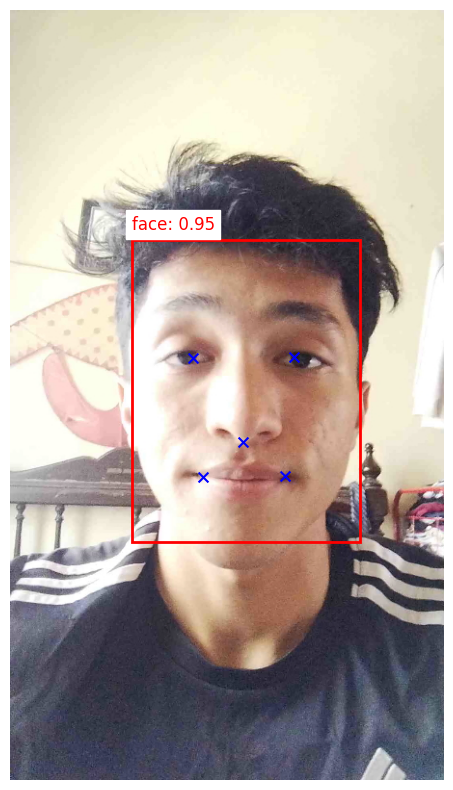

In [5]:
# Plotting
result = results[0]  # Assume results contain only one image's results
orig_img = result.orig_img

# Convert the image from BGR to RGB (since OpenCV loads images in BGR format)
img_rgb = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)

# Access the bounding boxes and class names
boxes = result.boxes.xyxy.cpu().numpy()  # Move to CPU and convert to NumPy array
class_ids = result.boxes.cls.cpu().numpy()  # Move to CPU and convert to NumPy array
confidence_scores = result.boxes.conf.cpu().numpy()  # Move to CPU and convert to NumPy array
class_names = result.names  # Dictionary mapping class IDs to class names

# Access keypoints
keypoints = result.keypoints.xy.cpu().numpy()  # Convert keypoints to NumPy array

# Plot the image
plt.figure(figsize=(10, 10))
plt.imshow(img_rgb)

# Plot each bounding box and keypoints
for i in range(len(boxes)):
    x1, y1, x2, y2 = boxes[i]
    class_id = int(class_ids[i])
    confidence = confidence_scores[i]
    label = f"{class_names[class_id]}: {confidence:.2f}"

    # Draw the rectangle
    plt.gca().add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, edgecolor='red', facecolor='none', linewidth=2))

    # Put the label near the bounding box
    plt.text(x1, y1 - 10, label, color='red', fontsize=12, backgroundcolor='white')

    # Plot keypoints
    for j in range(keypoints.shape[1]):
        kp_x, kp_y = keypoints[i, j]  # Extract x, y for the j-th keypoint of the i-th detection
        plt.scatter(kp_x, kp_y, color='blue', s=50, marker='x')  # Plot each keypoint with a larger marker

# Show the plot
plt.axis('off')
plt.show()

In [6]:
directory = '/mnt2/shared/jingjie/Unprocessed/fd_data/production_202404_liveness_rejected/face/frames'

print("Contents of Directory:", directory)
for item in os.listdir(directory):
    print(item)

Contents of Directory: /mnt2/shared/jingjie/Unprocessed/fd_data/production_202404_liveness_rejected/face/frames
b35d0791-0bb1-479f-8cc3-013852ce8697
ed85e3a7-acc9-49d5-95fa-47adf44f87b2
e72fff25-b22e-4eb9-b3dd-3ad701a89d4d
7464335d-9d30-46fc-9493-f62cad6c4c06
6fafe175-4dd6-44a2-8aad-6be2f86accd2
8d2490ab-63c2-4863-9640-d02ee4bfcc5b
aaede6bd-db7a-4ca4-a014-ecc08abc4692
bf0ff114-3191-4dc9-a68d-8d5765f0c0aa
21063659-c586-46bd-928c-9ffd05d0c72d
f0b8a925-3552-4920-a562-6d77913184df
0fe35770-d1d1-4542-b9be-c0df22dbdf84
1196aa77-79be-4d03-8b4a-5a69596784be
eeedf8b4-5184-4cdc-9e94-c7a8153471ac
b2779c0a-1c11-439f-a1a9-c4a5b6c2894b
90438969-d462-4a31-b2f6-26b5f21afe3a
bb1016cf-af6b-44f9-8832-e9f0e089998d
f94b020f-9a55-46aa-93ec-b5a9319cdb7d
227c2acd-b9ef-4479-9e82-c65fb4bc832e
4856f564-df61-4711-9649-22438d137add
2de2bc1b-dd43-4d9d-8963-a793b75fb556
ffd68b82-520e-4197-992a-d542841463dd
6268e735-46d4-4561-9377-c3890395ab4b
4b16a476-4f86-49de-a855-66b88258f4d8
5253820f-5b87-4110-a97d-6999c8db5957
